# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
sys.path.append('../')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

In [37]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
# Taking a look at the data for a city
print(response)

{'coord': {'lon': -72.42, 'lat': -35.33}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 13.58, 'feels_like': 11.78, 'temp_min': 13.58, 'temp_max': 13.58, 'pressure': 1021, 'humidity': 93, 'sea_level': 1021, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 3.67, 'deg': 193}, 'clouds': {'all': 21}, 'dt': 1607830764, 'sys': {'country': 'CL', 'sunrise': 1607851731, 'sunset': 1607903975}, 'timezone': -10800, 'id': 3893726, 'name': 'Constitución', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
#Set up lists to hold response info
city_name = []
city_lat = []
city_lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
index_counter = 0
set_counter = 1

In [5]:
print('Beginning Data Retrieval ')
print('-----------------------------')

# Loop through the list of cities and perform a request for data on each...
for index, city in enumerate(cities):
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
       
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
  
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except:
        print('City not found. Skipping...')
        
print('-----------------------------')
print('Data Retrieval Complete ')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | faya
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | tarnobrzeg
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | straumen
Processing Record 10 of Set 1 | veinticinco de mayo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | yulara
City not found. Skipping...
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | vostok
Processing Record 14 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 15 of Set 1 | monfalcone
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | manono
Processing Record 18 of Set 1 | okha
Processing Record 19 of Set 1 | hirara
Processing Record 20 of Se

City not found. Skipping...
Processing Record 32 of Set 4 | tura
Processing Record 33 of Set 4 | bara
Processing Record 34 of Set 4 | gryazovets
Processing Record 35 of Set 4 | namatanai
Processing Record 36 of Set 4 | bredy
Processing Record 37 of Set 4 | oyem
Processing Record 38 of Set 4 | fomboni
Processing Record 39 of Set 4 | suraabad
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | comodoro rivadavia
Processing Record 42 of Set 4 | sakakah
City not found. Skipping...
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | majene
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | batticaloa
Processing Record 50 of Set 4 | esperance
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | bama
Processin

City not found. Skipping...
Processing Record 20 of Set 8 | martapura
Processing Record 21 of Set 8 | viedma
Processing Record 22 of Set 8 | jalu
Processing Record 23 of Set 8 | chifeng
Processing Record 24 of Set 8 | tiarei
Processing Record 25 of Set 8 | trairi
Processing Record 26 of Set 8 | nyurba
Processing Record 27 of Set 8 | bokoro
Processing Record 28 of Set 8 | taltal
Processing Record 29 of Set 8 | mishan
Processing Record 30 of Set 8 | kampot
Processing Record 31 of Set 8 | soyo
Processing Record 32 of Set 8 | novo aripuana
Processing Record 33 of Set 8 | kargasok
Processing Record 34 of Set 8 | zunyi
Processing Record 35 of Set 8 | kalemie
Processing Record 36 of Set 8 | ko samui
Processing Record 37 of Set 8 | cururupu
Processing Record 38 of Set 8 | tuatapere
Processing Record 39 of Set 8 | bairiki
City not found. Skipping...
Processing Record 40 of Set 8 | kandrian
Processing Record 41 of Set 8 | lompoc
City not found. Skipping...
Processing Record 42 of Set 8 | gidole


Processing Record 4 of Set 12 | san-pedro
Processing Record 5 of Set 12 | schwalmtal
Processing Record 6 of Set 12 | maneadero
Processing Record 7 of Set 12 | belle fourche
Processing Record 8 of Set 12 | yining
Processing Record 9 of Set 12 | acarau
Processing Record 10 of Set 12 | makat
Processing Record 11 of Set 12 | anadyr
Processing Record 12 of Set 12 | dingzhou
Processing Record 13 of Set 12 | polson
Processing Record 14 of Set 12 | vagay
Processing Record 15 of Set 12 | hollins
Processing Record 16 of Set 12 | wattegama
Processing Record 17 of Set 12 | alpena
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create DataFrame
city_df = pd.DataFrame({"City": city_name, "Lat": city_lat , "Lng": city_lng, "Max Temp": max_temp, "Humidity": humidity , 
                        "Cloudiness":cloudiness , "Wind Speed":wind_speed, "Country":country , "Date":date  })
city_df.to_csv("output_data/city_df.csv", index = False)

In [7]:
city_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,23.00,73,90,7.20,AU,1607822160
1,Faya,18.39,42.45,12.00,87,0,0.18,SA,1607822161
2,Kapaa,22.08,-159.32,28.00,65,20,6.20,US,1607822161
3,Khatanga,71.97,102.50,-26.50,89,100,3.60,RU,1607822161
4,Tarnobrzeg,50.57,21.68,1.67,89,20,2.24,PL,1607822161


In [8]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.040329,12.239239,10.841194,75.896194,57.430796,3.684464,1.607822e+09
std,32.902309,87.369746,16.200429,19.020274,40.382009,2.637286,7.015497e+01
min,-54.800000,-175.200000,-43.850000,17.000000,0.000000,0.080000,1.607822e+09
25%,-5.502500,-61.250000,0.827500,69.000000,13.750000,1.660000,1.607822e+09
50%,22.640000,12.285000,16.000000,81.000000,75.000000,3.100000,1.607822e+09
75%,47.607500,81.637500,23.897500,90.000000,99.000000,5.100000,1.607822e+09
max,78.220000,179.320000,33.000000,100.000000,100.000000,15.000000,1.607822e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

### NOTE: per the column Humidty and Row max stating 100 is the max for Humidity, there are not any cities that have a humidity > 100%. THIS SECTION WAS SKIPPED PER THE INSTRUCTIONS.


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
# Adding the date to the title using when the API was called.
from datetime import datetime
now = datetime.now()
timestamp = datetime.timestamp(now)
dt_object = datetime.fromtimestamp(timestamp)
print("datetime = ", dt_object)

datetime =  2020-12-12 19:27:19.829148


In [18]:
# Converting Celsius to Fahrenheit
def to_fahr(C):
    return (C*9/5) + 32
city_convert_temp = city_df[['Max Temp']].apply(to_fahr)
# Getting list for Fahrenheit temperatures
temp_f = city_convert_temp['Max Temp'].to_list()

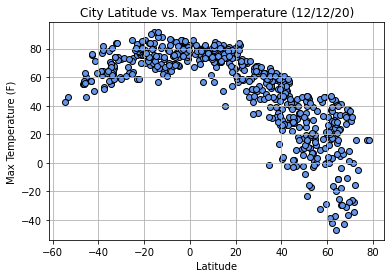

In [19]:
# Plotting Latitude vs. Temperature Plot
plt.scatter(city_lat, temp_f, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Max Temperature ({ dt_object.strftime("%D") })')
plt.grid(b=None, which = 'major',axis = 'both')
plt.savefig('output_data/lat_vs_Temp.png')

### The Latitude vs. Temperature Plot plot shows that the temperatures in cities from the Northern Hemisphere tend to drop during the month of December 2020. The cities that are further away from the equator are colder.

## Latitude vs. Humidity Plot

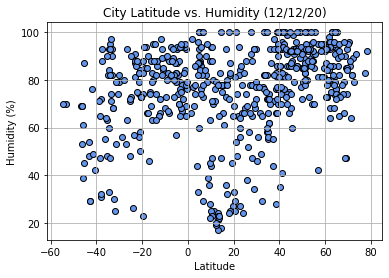

In [20]:
# Plotting Latitude vs. Humidity Plot
plt.scatter(city_lat, humidity, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Humidity ({ dt_object.strftime("%D") })')
plt.grid(b=None, which = 'major',axis = 'both')
plt.savefig('output_data/lat_vs_humidity.png')

### Latitude vs. Humidity Plot shows that there are more cities from the Northern Hemisphere that have a higher % of humidity during the month of December 2020 than those cities below the 0 degrees mark or Southern Hemisphere.


## Latitude vs. Cloudiness Plot

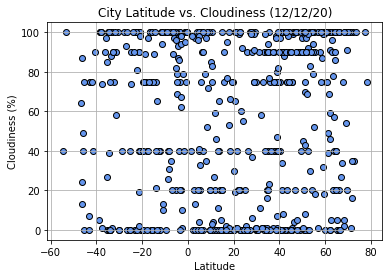

In [21]:
# Plotting Latitude vs. Cloudiness Plot
plt.scatter(city_lat, cloudiness, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Cloudiness ({ dt_object.strftime("%D") })')
plt.grid(b=None, which = 'major',axis = 'both')
plt.savefig('output_data/lat_vs_cloudiness.png')

### Latitude vs. Cloudiness Plot shows that the percentage of cloud cover over cities from the Northern Hemisphere is more than the Southern Hemisphere during the month of December 2020.

## Latitude vs. Wind Speed Plot

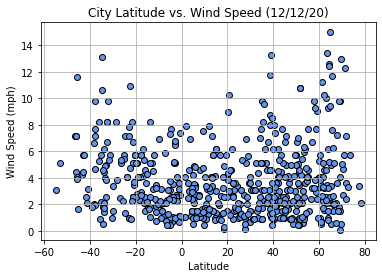

In [22]:
# Plotting Latitude vs. Wind Speed Plot
plt.scatter(city_lat, wind_speed, marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Wind Speed ({ dt_object.strftime("%D") })')
plt.grid(b=None, which = 'major',axis = 'both')
plt.savefig('output_data/lat_vs_windspeed.png')

### Latitude vs. Wind Speed Plot shows that generally wind speeds of 0-6 mph exists both in cities from the Northern Hemisphere and Southern Hemisphere during the month of December 2020.### 

## Linear Regression

In [23]:
# Creating Northern and Southern Hemisphere Dataframes
N_hemisphere = city_df.loc[city_df['Lat']>=0]
S_hemisphere = city_df.loc[city_df['Lat']<0] 

In [24]:
import scipy.stats as st

In [25]:
N_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp_(F)
1,Faya,18.39,42.45,12.00,87,0,0.18,SA,1607822161,53.600
2,Kapaa,22.08,-159.32,28.00,65,20,6.20,US,1607822161,82.400
3,Khatanga,71.97,102.50,-26.50,89,100,3.60,RU,1607822161,-15.700
4,Tarnobrzeg,50.57,21.68,1.67,89,20,2.24,PL,1607822161,35.006
7,Cherskiy,68.75,161.30,-23.52,90,100,1.80,RU,1607822162,-10.336
...,...,...,...,...,...,...,...,...,...,...
573,Polson,47.69,-114.16,-3.89,100,5,0.89,US,1607822253,24.998
574,Vagay,57.94,69.02,-8.59,95,100,3.28,RU,1607822253,16.538
575,Hollins,37.34,-79.94,16.00,55,90,2.10,US,1607822253,60.800
576,Wattegama,6.80,81.48,23.00,100,90,1.50,LK,1607822254,73.400


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8219455593323586


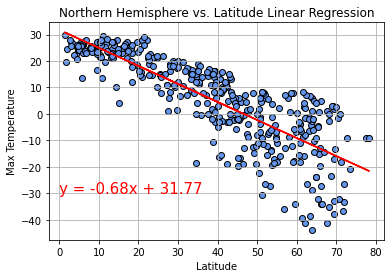

<Figure size 432x288 with 0 Axes>

In [26]:
#Northern Hemisphere 
correlation = st.pearsonr(N_hemisphere['Lat'], N_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Max Temp'])
regress_values = N_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_hemisphere['Lat'], N_hemisphere['Max Temp'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(N_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.show()
plt.savefig('output_data/N_hemisphere_maxtemp.png')

### The Northern Hemisphere - Max Temp vs. Latitude Linear Regression plot and negative r-value shows that there is a negative correlation. The further away a city is from the equator (0 degrees latitude) the colder it is. Temperature doesen't increase along with Latitude increase, thus the correlation is negative.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5843467329752622


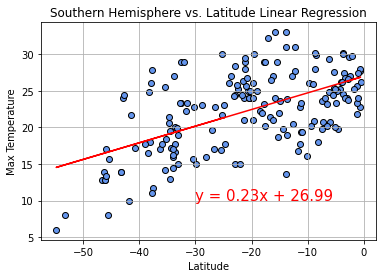

In [27]:
#Southern Hemisphere
correlation = st.pearsonr(S_hemisphere['Lat'], S_hemisphere['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Max Temp'])
regress_values = S_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_hemisphere['Lat'], S_hemisphere['Max Temp'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(S_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.savefig('output_data/S_hemisphere_maxtemp.png')
plt.show()

### The Southern Hemisphere - Max Temp vs. Latitude Linear Regression plot and positive r-value shows that there is a positive correlation. The closer the city is to the equator, the hotter the city is. Both latitude and Temp increase show a positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3822187276967446


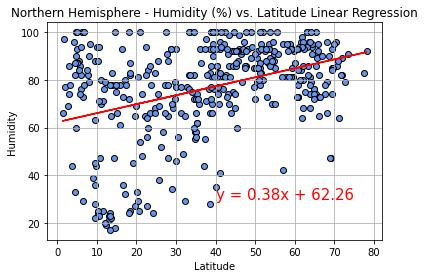

In [28]:
#Northern Hemisphere
correlation = st.pearsonr(N_hemisphere['Lat'], N_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Humidity'])
regress_values = N_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_hemisphere['Lat'], N_hemisphere['Humidity'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(N_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.savefig('output_data/N_hemisphere_humidity.png')
plt.show()

### The Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression plot and positive r-value show that there is a positive correlation. The further away the city is to the equator, the % of humidity increases. Both latitude and humidity increase show a positive correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.40737981458608014


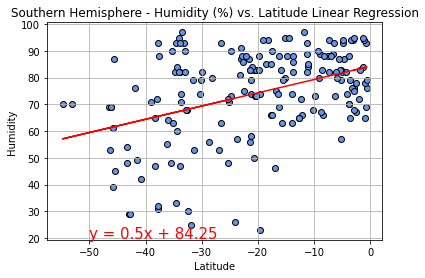

In [29]:
# Southern Hemisphere
correlation = st.pearsonr(S_hemisphere['Lat'], S_hemisphere['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Humidity'])
regress_values = S_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_hemisphere['Lat'], S_hemisphere['Humidity'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(S_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.savefig('output_data/S_hemisphere_humidity.png')
plt.show()

### The Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression plot and positive r-value show that there is a positive correlation. The closer the city is to the equator, the % of humidity increases. Both latitude and humidity increase show a positive correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2548881451111672


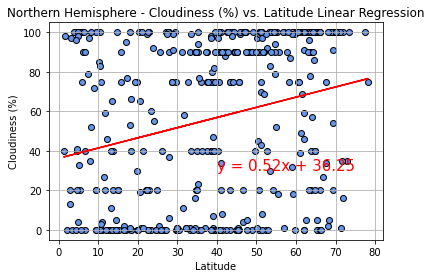

In [30]:
#Northern Hemisphere
correlation = st.pearsonr(N_hemisphere['Lat'], N_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Cloudiness'])
regress_values = N_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_hemisphere['Lat'], N_hemisphere['Cloudiness'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(N_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.savefig('output_data/N_hemisphere_cloudiness.png')
plt.show()

### The Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression plot and positive r-value show that there is a positive correlation. The further away the city is to the equator, the % of cloudiness increases. Both latitude and cloud increase show a positive correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1444876486529733


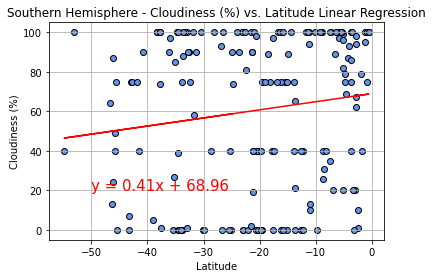

In [31]:
# Southern Hemisphere
correlation = st.pearsonr(S_hemisphere['Lat'], S_hemisphere['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Cloudiness'])
regress_values = S_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_hemisphere['Lat'], S_hemisphere['Cloudiness'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(S_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.savefig('output_data/S_hemisphere_cloudiness.png')
plt.show()

### The Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot and r-value show that there is a positive correlation. The closer the city is to the equator, the % of cloudiness increases. The indication that both latitude and cloud increase show a positive correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.22718000556593604


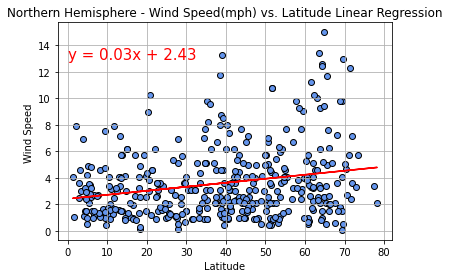

In [32]:
#Northern Hemisphere
correlation = st.pearsonr(N_hemisphere['Lat'], N_hemisphere['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Wind Speed'])
regress_values = N_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(N_hemisphere['Lat'], N_hemisphere['Wind Speed'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(N_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=15,color="red")
plt.ylabel('Wind Speed ')
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.savefig('output_data/N_hemisphere_windspeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

### The Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression plot and positive, but low r-value show that there is a weak correlation. The r-value is almost 0 and the line is almost flat. The wind speed increases ever so slightly as the latitude increases. Both latitude and windspeed increase showing a weak correlation.

The r-value is -0.32988482788407464


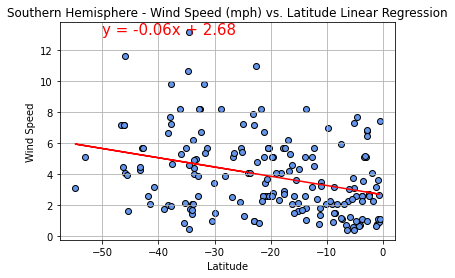

In [33]:
# Southern Hemisphere
correlation = st.pearsonr(S_hemisphere['Lat'], S_hemisphere['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Wind Speed'])
regress_values = S_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(S_hemisphere['Lat'], S_hemisphere['Wind Speed'], marker="o", facecolors="cornflowerblue", edgecolors="black")
plt.plot(S_hemisphere['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,13),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.grid(b=None, which = 'major',axis = 'both')
print(f"The r-value is {round(correlation[0],17)}")
plt.savefig('output_data/S_hemisphere_windspeed.png')
plt.show()

### The Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression plot and negative r-value show that there is a negative correlation. The wind speed decreases as the latitude increases closer to the equator. Latitude increase and windspeed decrease show a negative correlation.